In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import joblib

In [56]:
# import the dataset
df = pd.read_csv('output.csv')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,false_starts,hedge_words,hesitations,silent_pauses,incomplete_sent,pitch_variability,speech_rate,naming_association,word_repetitions,hesitations/length,label
0,0,0,2,0,0,35.002844,0.189103,0,0,0.003040,0
1,0,5,11,0,1,61.344519,0.168911,1,1,0.019366,1
2,0,1,1,1,2,52.830361,0.201410,3,0,0.001597,0
3,0,2,2,0,1,36.410831,0.230560,2,0,0.003021,0
4,0,7,4,0,2,53.064223,0.136143,0,0,0.007968,1
5,1,4,6,12,2,47.152534,0.171429,4,1,0.009202,1
6,0,0,3,3,0,50.078914,0.193836,0,0,0.007160,0
7,0,3,2,0,0,61.536519,0.164216,0,0,0.003200,0
8,0,1,4,0,1,40.381104,0.157258,0,0,0.021390,0
9,0,1,3,0,1,52.416026,0.110801,2,1,0.006550,1


In [57]:
# drop the label column and save to df_trans
df_trans = df.drop(["label"] , axis = 1)

In [58]:
# use standard scaler for scaling
ss = StandardScaler()
df_scaled = ss.fit_transform(df_trans)

In [59]:
# perform pca to get two important columns 
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(df_scaled)

In [60]:
# For PCA 1 components
# Get indices of top 1 features by absolute weight
top_pc1_indices = np.argsort(np.abs(pca.components_[:1]))[: ,-1:]
# Corresponding feature names
pc1_top_features = [df_trans.columns[top_pc1_indices[0][0]]]

In [61]:
pc1_top_features

['word_repetitions']

In [62]:
# for PCA 2 components
# Get indices of top 1 features by absolute weight
top_pc2_indices = np.argsort(np.abs([pca.components_[1 , :]]))[: ,-1:]
# Corresponding feature names
pc2_top_features = [df_trans.columns[top_pc2_indices[0][0]]]

In [63]:
pc2_top_features

['naming_association']

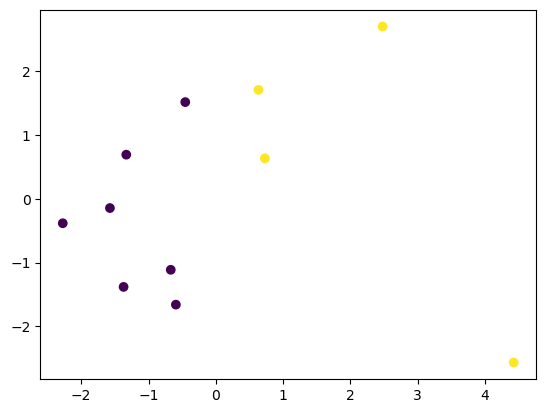

In [64]:
# visualization using scatter plot
plt.scatter(pca_scaled[: , 0] , pca_scaled[: , 1] , c = df["label"])

ANOMALY DETECTION USING ISOLATION FOREST

In [67]:
# initializes and fit the data
clf = IsolationForest(contamination='auto')
clf.fit(pca_scaled)
predictions= clf.predict(pca_scaled)

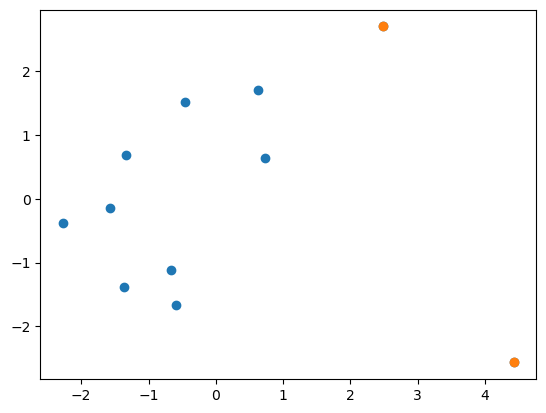

In [68]:
# visualization the result of isolation forest
index= np.where(predictions<0)
plt.scatter(pca_scaled[: ,0] , pca_scaled[: , 1])
plt.scatter(pca_scaled[index , 0] , pca_scaled[index , 1])

ANOMALY DETECTION USING DBSCAN

In [69]:
# initializes and fit the data
dbscan = DBSCAN(eps = 0.4)
dbscan.fit(pca_scaled)
predictions =dbscan.fit_predict(pca_scaled)

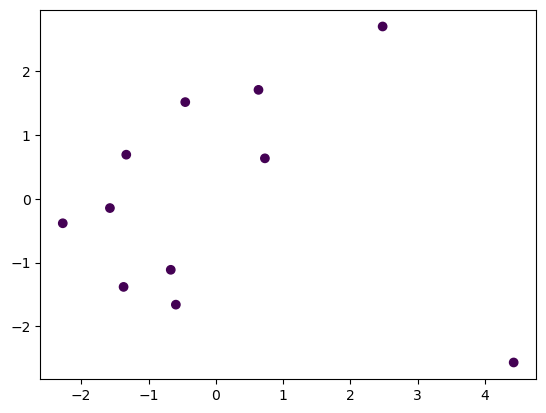

In [70]:
# visualization the result of DBSCAN
plt.scatter(pca_scaled[: , 0] , pca_scaled[:, 1] , c= dbscan.labels_)

USE CLUSTERING FOR PREDICTION (KMeans cluster) 

In [71]:
# finding the best k using wcss
wcss = []
for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k , init = 'k-means++')
    kmeans.fit(pca_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\DELL\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

([<matplotlib.axis.XTick at 0x2547a1a7380>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

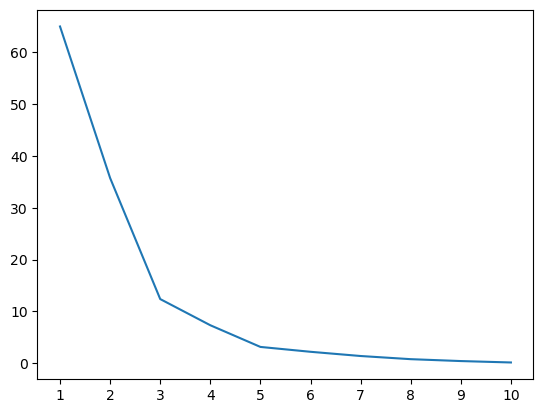

In [72]:
##plot elbow curve
plt.plot(range(1,11) , wcss)
plt.xticks(range(1 ,11))

In [73]:
# we use k = 3 for best prediction 
kmeans = KMeans(n_clusters=3 , init = 'k-means++' , random_state=0)
y_pred = kmeans.fit_predict(pca_scaled)

c:\Users\DELL\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
y_pred

array([0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0])

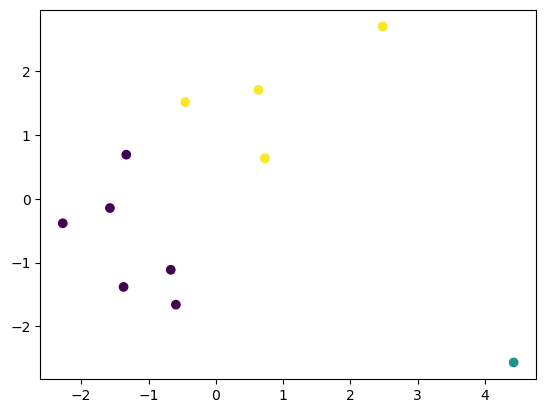

In [75]:
# visualization the result of kmeans cluster 
plt.scatter(pca_scaled[: ,0] , pca_scaled[: , 1] , c = y_pred , cmap='viridis')

AMONG ISOLATION FOREST  , DBSCAN AND KMEANS , WE USE KMEANS BECAUSE IT GIVES GOOD RESULTS AMONG THESE 

In [76]:
# Save the model
joblib.dump(kmeans, 'my_model.joblib')
# Save the scaler
joblib.dump(ss, 'my_scaler.joblib')
# save the pca
joblib.dump(pca , 'my_pca.joblib')

['my_pca.joblib']